Ideal Low Pass Filter (ILPF)

An Ideal Low Pass Filter (ILPF) is a frequency-domain filter that allows frequencies below a certain cutoff frequency to pass through while attenuating higher frequencies completely. It is commonly used to smooth images or remove high-frequency noise.

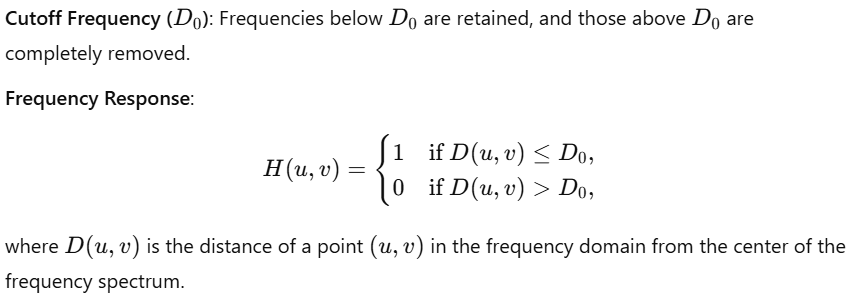

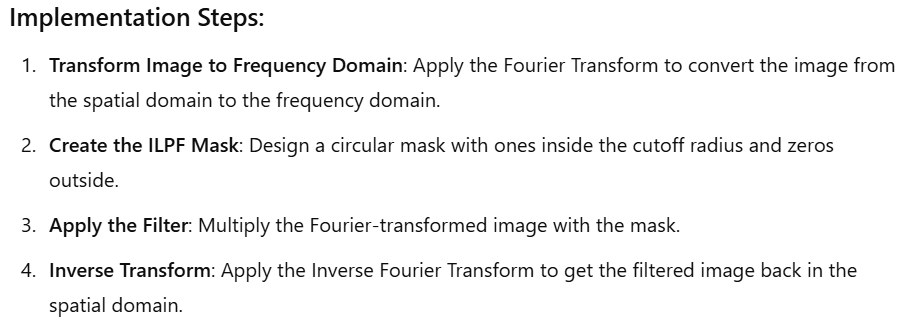

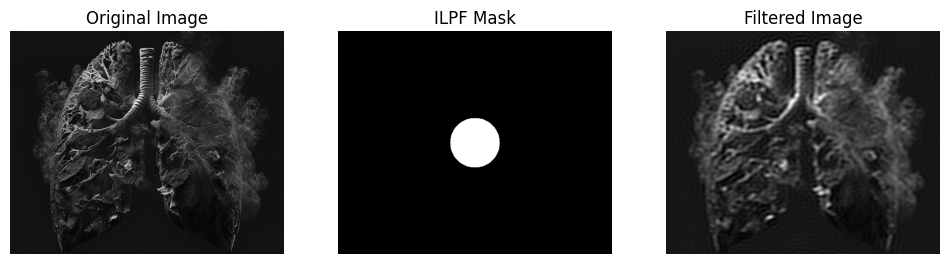

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_low_pass_filter(image, cutoff_frequency):
    # Step 1: Get image dimensions and calculate the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Step 2: Perform the Fourier Transform and shift zero frequency component to center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Step 3: Create the Ideal Low Pass Filter Mask
    mask = np.zeros((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            if np.sqrt((u - crow)**2 + (v - ccol)**2) <= cutoff_frequency:
                mask[u, v] = 1

    # Step 4: Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Step 5: Perform the Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Ideal Low Pass Filter
    cutoff_frequency = 50  # Define the cutoff frequency
    filtered_image, mask = ideal_low_pass_filter(image, cutoff_frequency)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("ILPF Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


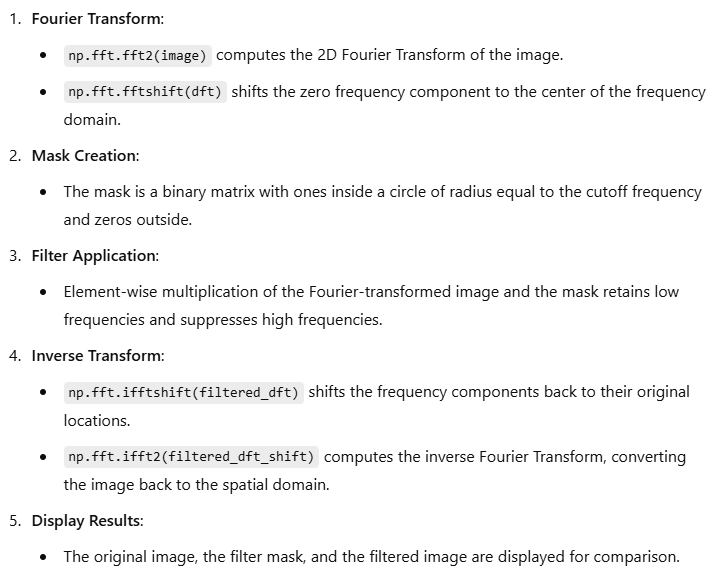

Butterworth Lowpass Filter (BLPF)

A Butterworth Lowpass Filter (BLPF) is a frequency-domain filter that allows frequencies below a certain cutoff frequency to pass while smoothly attenuating higher frequencies. Unlike the Ideal Low Pass Filter, the Butterworth filter transitions smoothly, reducing ringing artifacts in the filtered image.

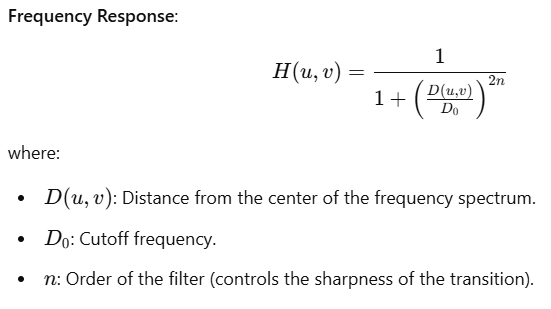

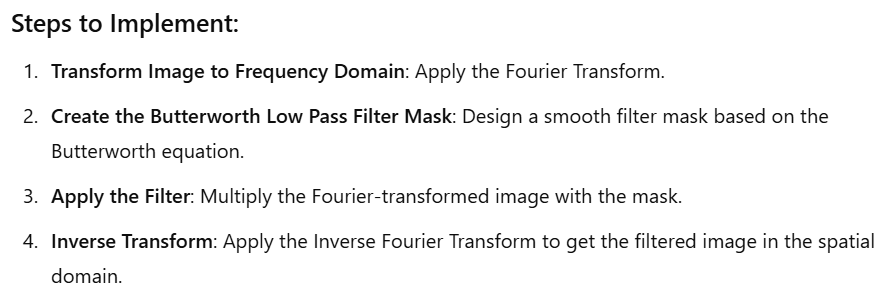

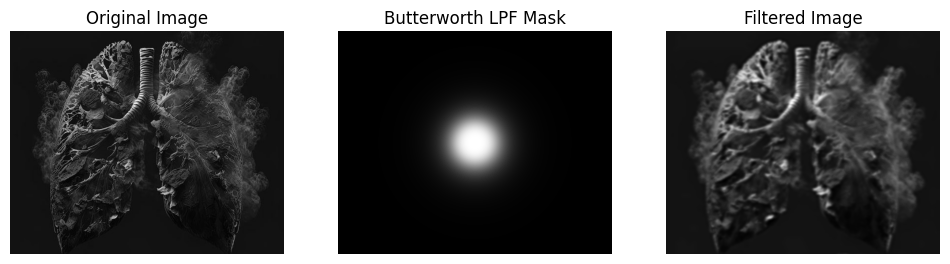

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_low_pass_filter(image, cutoff_frequency, order):
    # Step 1: Get image dimensions and calculate the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Step 2: Perform the Fourier Transform and shift zero frequency component to center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Step 3: Create the Butterworth Low Pass Filter Mask
    mask = np.zeros((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow)**2 + (v - ccol)**2)
            mask[u, v] = 1 / (1 + (distance / cutoff_frequency)**(2 * order))

    # Step 4: Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Step 5: Perform the Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Butterworth Low Pass Filter
    cutoff_frequency = 50  # Define the cutoff frequency
    order = 2  # Define the order of the filter
    filtered_image, mask = butterworth_low_pass_filter(image, cutoff_frequency, order)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Butterworth LPF Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


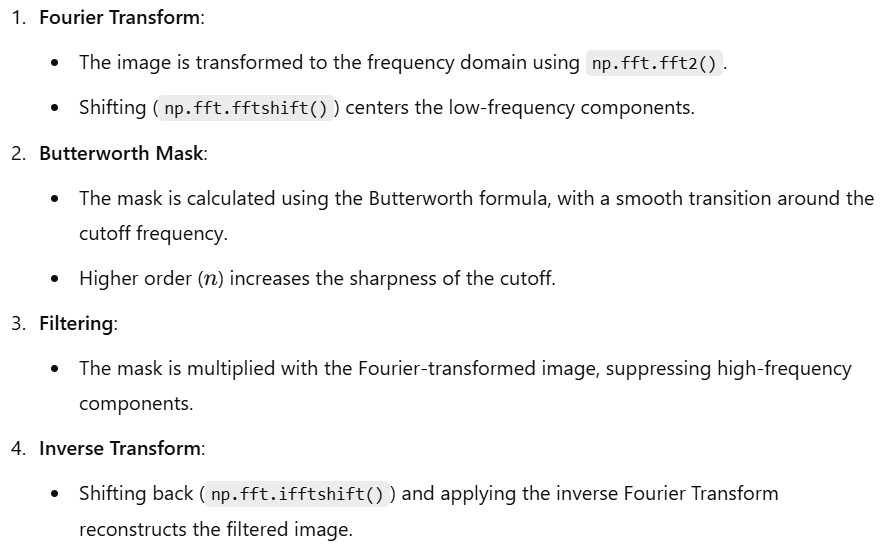

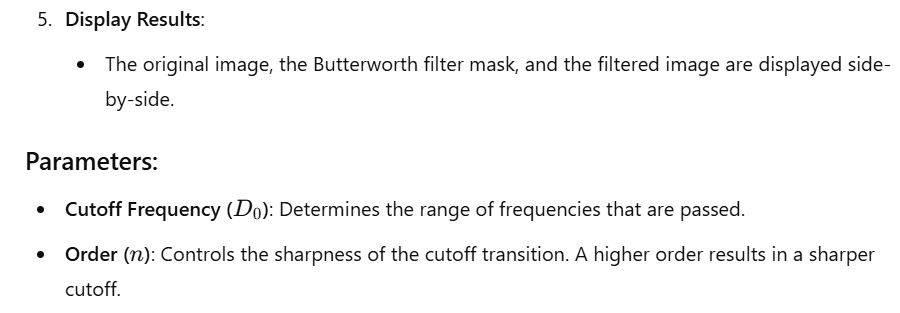

Gaussian Lowpass Filter (GLPF)

A Gaussian Lowpass Filter (GLPF) is a frequency-domain filter that attenuates high-frequency components smoothly while preserving low frequencies. It is based on a Gaussian function, which ensures a smooth transition without the sharp cutoff of ideal filters.

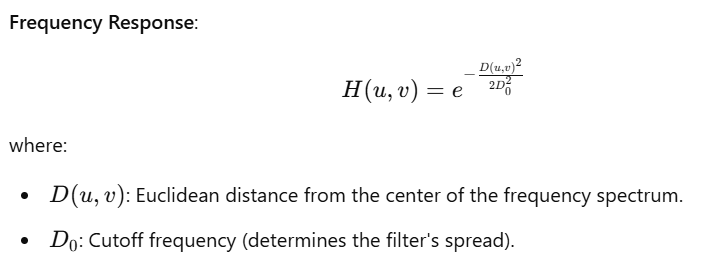

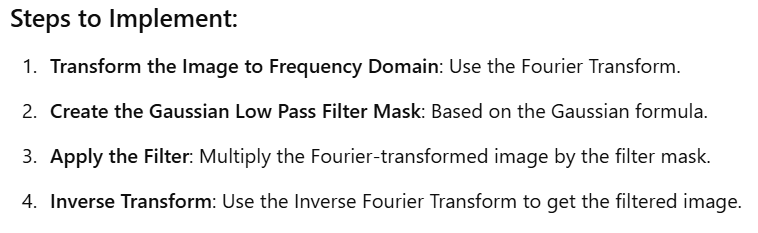

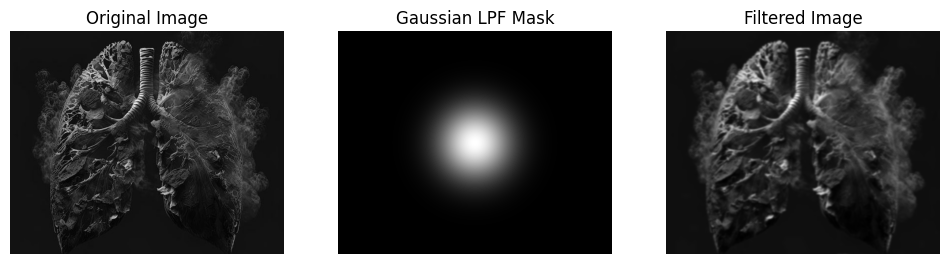

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_low_pass_filter(image, cutoff_frequency):
    # Step 1: Get image dimensions and calculate the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Step 2: Perform the Fourier Transform and shift zero frequency component to center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Step 3: Create the Gaussian Low Pass Filter Mask
    mask = np.zeros((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow)**2 + (v - ccol)**2)
            mask[u, v] = np.exp(-distance**2 / (2 * (cutoff_frequency**2)))

    # Step 4: Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Step 5: Perform the Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Gaussian Low Pass Filter
    cutoff_frequency = 50  # Define the cutoff frequency
    filtered_image, mask = gaussian_low_pass_filter(image, cutoff_frequency)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Gaussian LPF Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


Ideal High Pass Filter (IHPF)

An Ideal High Pass Filter (IHPF) allows high-frequency components of an image to pass while blocking low-frequency components. This is useful for enhancing edges and fine details.

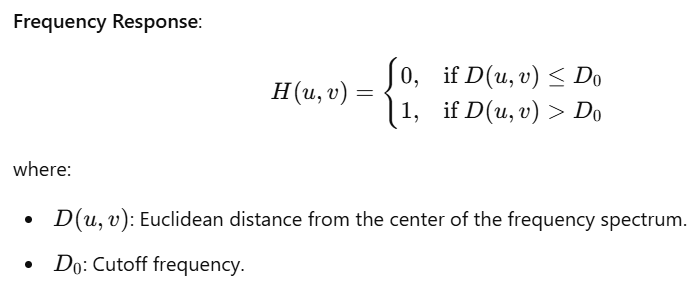

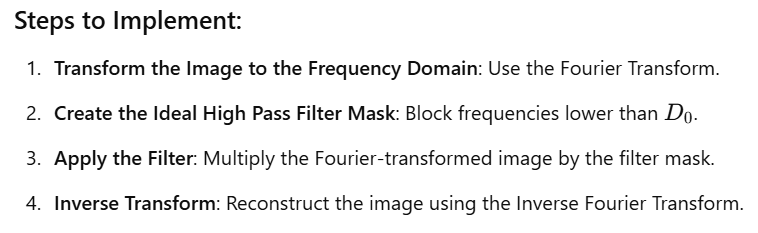

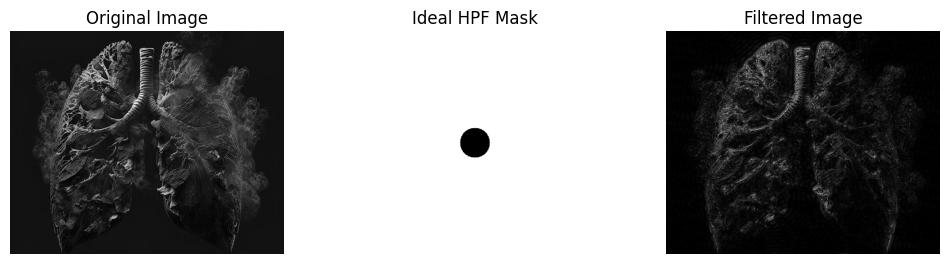

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_high_pass_filter(image, cutoff_frequency):
    # Step 1: Get image dimensions and calculate the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Step 2: Perform the Fourier Transform and shift zero frequency component to center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Step 3: Create the Ideal High Pass Filter Mask
    mask = np.ones((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow)**2 + (v - ccol)**2)
            if distance <= cutoff_frequency:
                mask[u, v] = 0  # Block low frequencies

    # Step 4: Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Step 5: Perform the Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Ideal High Pass Filter
    cutoff_frequency = 30  # Define the cutoff frequency
    filtered_image, mask = ideal_high_pass_filter(image, cutoff_frequency)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Ideal HPF Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


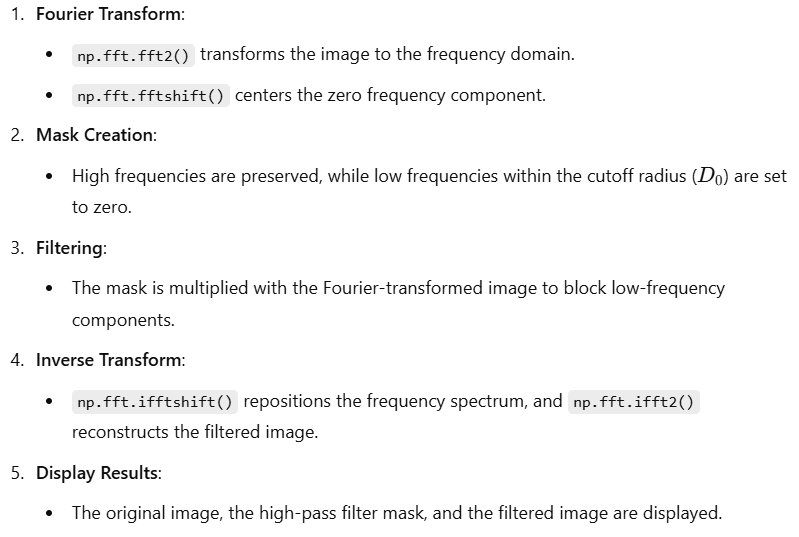

Butterworth High Pass Filter (BHPF)

The Butterworth High Pass Filter (BHPF) allows high-frequency components to pass while attenuating low frequencies with a smoother transition than the ideal high-pass filter. Its frequency response is controlled by the cutoff frequency and filter order.

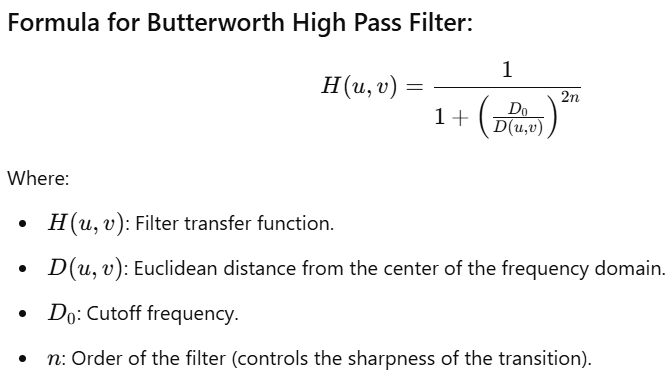

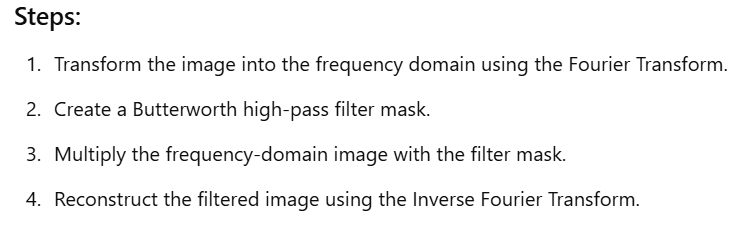

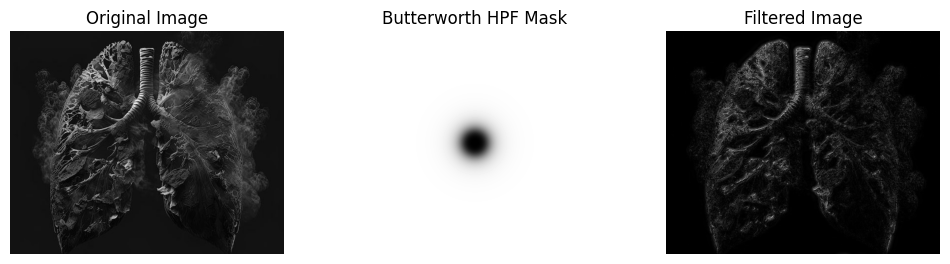

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_high_pass_filter(image, cutoff_frequency, filter_order):
    # Step 1: Get image dimensions and calculate the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Step 2: Perform the Fourier Transform and shift the zero frequency component to the center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Step 3: Create the Butterworth High Pass Filter Mask
    u, v = np.meshgrid(np.arange(0, cols), np.arange(0, rows))
    D = np.sqrt((u - ccol)**2 + (v - crow)**2)  # Distance from the center
    mask = 1 / (1 + (cutoff_frequency / (D + 1e-5))**(2 * filter_order))  # Add small value to avoid division by zero

    # Step 4: Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Step 5: Perform the Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Butterworth High Pass Filter
    cutoff_frequency = 30  # Define the cutoff frequency
    filter_order = 2       # Define the filter order
    filtered_image, mask = butterworth_high_pass_filter(image, cutoff_frequency, filter_order)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Butterworth HPF Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


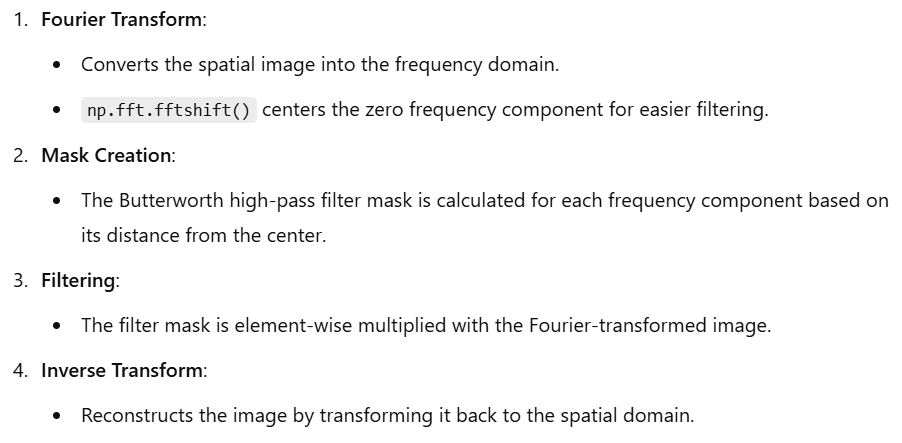

Gaussian High Pass Filter (GHPF)

The Gaussian High Pass Filter (GHPF) retains high-frequency components and attenuates low-frequency components with a smooth Gaussian-shaped transition. It's frequently used in image processing for edge detection and sharpening by filtering out the smooth, low-frequency variations.

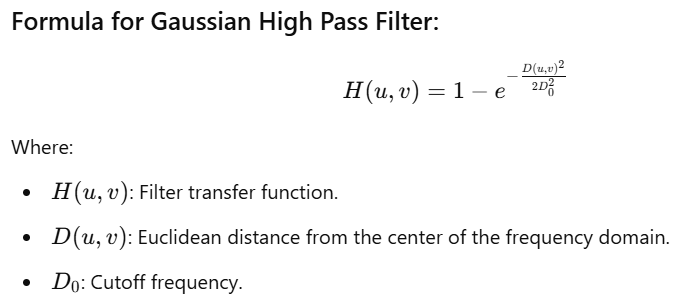

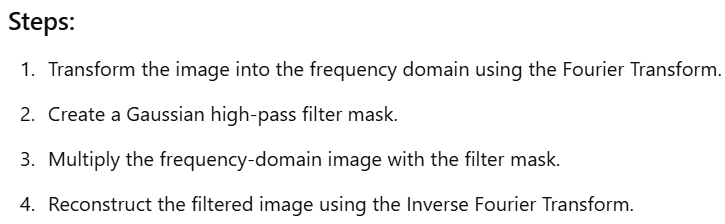

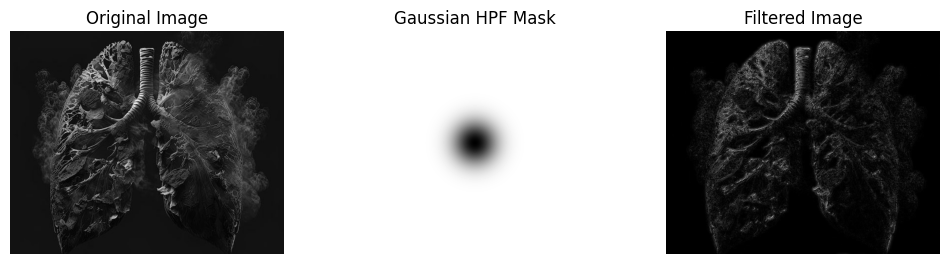

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_high_pass_filter(image, cutoff_frequency):
    # Step 1: Get image dimensions and calculate the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Step 2: Perform the Fourier Transform and shift the zero frequency component to the center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Step 3: Create the Gaussian High Pass Filter Mask
    u, v = np.meshgrid(np.arange(0, cols), np.arange(0, rows))
    D = np.sqrt((u - ccol)**2 + (v - crow)**2)  # Distance from the center
    mask = 1 - np.exp(-D**2 / (2 * (cutoff_frequency**2)))

    # Step 4: Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Step 5: Perform the Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Gaussian High Pass Filter
    cutoff_frequency = 30  # Define the cutoff frequency
    filtered_image, mask = gaussian_high_pass_filter(image, cutoff_frequency)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Gaussian HPF Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


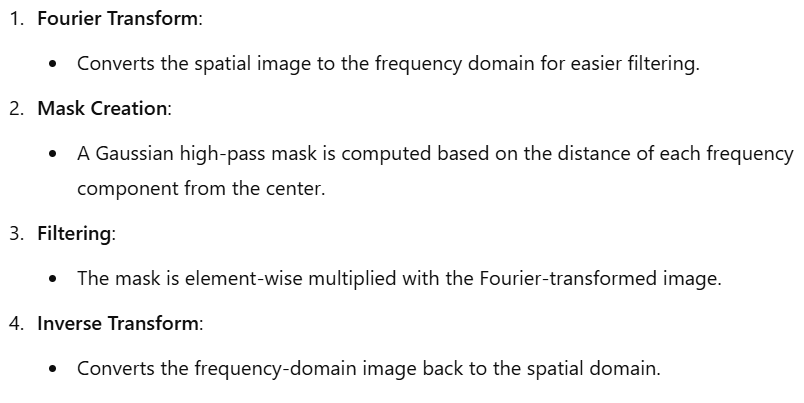

Bandpass Filter (BPF)

A Bandpass Filter (BPF) allows frequencies within a specified range (band) to pass through while attenuating frequencies outside that range. In image processing, a BPF can enhance specific frequency components in the frequency domain.

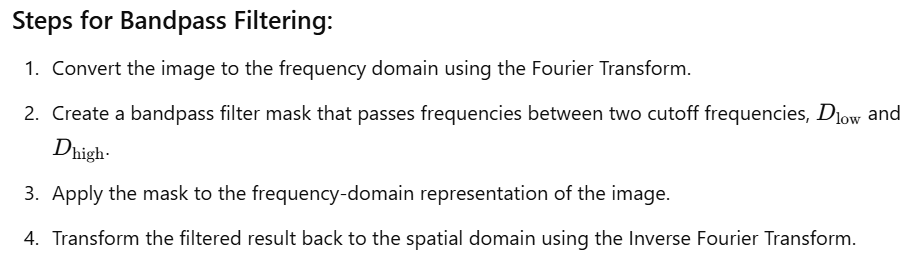

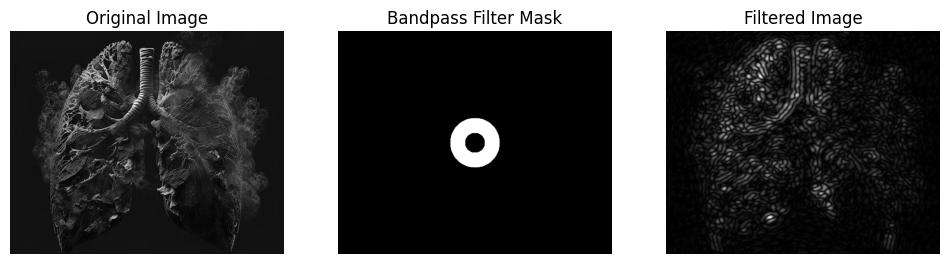

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bandpass_filter(image, low_cutoff, high_cutoff):
    """
    Apply a bandpass filter to the input image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        low_cutoff (float): Lower cutoff frequency.
        high_cutoff (float): Higher cutoff frequency.

    Returns:
        filtered_image (numpy.ndarray): Bandpass filtered image.
        mask (numpy.ndarray): Bandpass filter mask.
    """
    # Get image dimensions and compute the center
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center coordinates

    # Perform Fourier Transform and shift the zero frequency component to the center
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Create a meshgrid of frequency distances
    u, v = np.meshgrid(np.arange(0, cols), np.arange(0, rows))
    D = np.sqrt((u - ccol)**2 + (v - crow)**2)  # Distance from the center

    # Create a bandpass filter mask
    mask = np.logical_and(D >= low_cutoff, D <= high_cutoff).astype(np.float32)

    # Apply the mask to the frequency domain
    filtered_dft = dft_shift * mask

    # Perform Inverse Fourier Transform
    filtered_dft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_dft_shift)
    filtered_image = np.abs(filtered_image)

    return filtered_image, mask

# Load the grayscale image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the Bandpass Filter
    low_cutoff = 20  # Lower cutoff frequency
    high_cutoff = 50  # Higher cutoff frequency
    filtered_image, mask = bandpass_filter(image, low_cutoff, high_cutoff)

    # Display the results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Bandpass Filter Mask")
    plt.axis('off')

    # Filtered image
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()


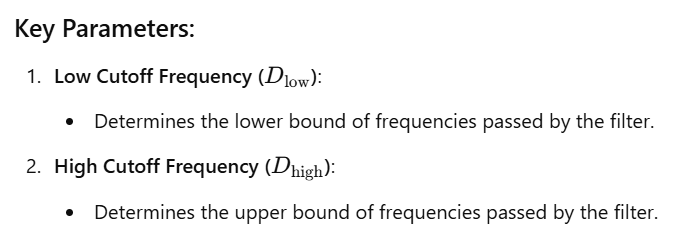

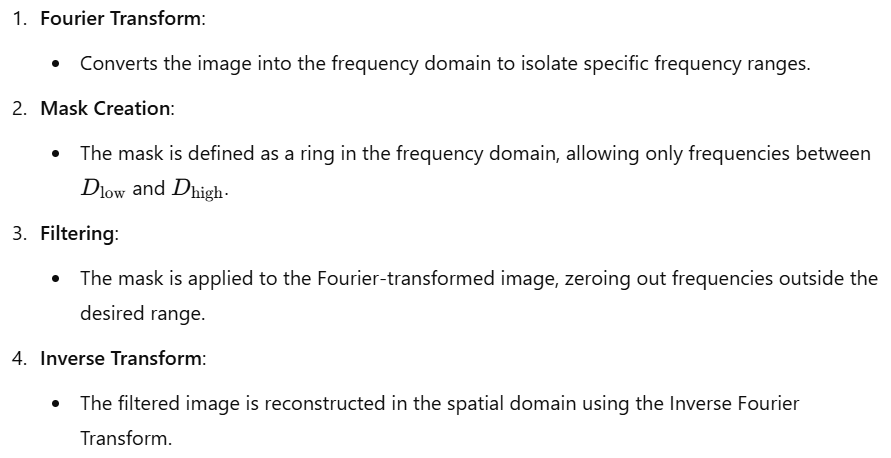